## NOTEBOOK IMPORTS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as mlt
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [8]:
raw_file_path = r'/home/alahira/Documents/Data science projects/Income_predictions/Datasets/raw/'
processed_file_path = r'/home/alahira/Documents/Data science projects/Income_predictions/Datasets/processed/'
model_path = r'/home/alahira/Documents/Data science projects/Income_predictions/Models/'

## DATA PREPROCESSING

In [9]:
#Create column labels to be passed to pandas dataframe
labels= ['age','work_class','fnlwgt','education','years_of_education','marital_status','occupation','relationship','race'
         ,'sex','capital_gain','capital_loss','hours_per_week','native_country','target']


In [10]:
income = pd.read_csv(raw_file_path + 'adult.csv', names=labels)

In [11]:
income.head(6)

,age,work_class,fnlwgt,education,years_of_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


TYPECASTING OPERATIONS

In [12]:
income['work_class'] = income['work_class'].astype('category')
income['education'] = income['education'].astype('category')
income['marital_status'] = income['marital_status'].astype('category')
income['occupation'] = income['occupation'].astype('category')
income['relationship'] = income['relationship'].astype('category')
income['race'] = income['race'].astype('category')
income['sex'] = income['sex'].astype('category')
income['native_country'] = income['native_country'].astype('category')
income['target'] = income['target'].astype('category')

print('Typecasting operations completed successfullty')

Typecasting operations completed successfullty


## EXPLORATORY DATA ANALYSIS

In [13]:
income.dtypes

age                      int64
work_class            category
fnlwgt                   int64
education             category
years_of_education       int64
marital_status        category
occupation            category
relationship          category
race                  category
sex                   category
capital_gain             int64
capital_loss             int64
hours_per_week           int64
native_country        category
target                category
dtype: object

CHECK FOR AND HANDLE MISSING DATA IF ANY

In [14]:
print ('Missing values : ', income.isnull().sum().sum())

income.isnull().sum()

Missing values :  0


age                   0
work_class            0
fnlwgt                0
education             0
years_of_education    0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country        0
target                0
dtype: int64

In [15]:
income['target'].unique()

[<=50K, >50K]
Categories (2, object): [<=50K, >50K]

In [16]:
income.corr()

,age,fnlwgt,years_of_education,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
years_of_education,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


There is very little multicollinearity among the explanatory variables 

In [17]:
numeric_variables = income[['age','fnlwgt','years_of_education','capital_gain','capital_loss','hours_per_week']] 

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 8.82 µs


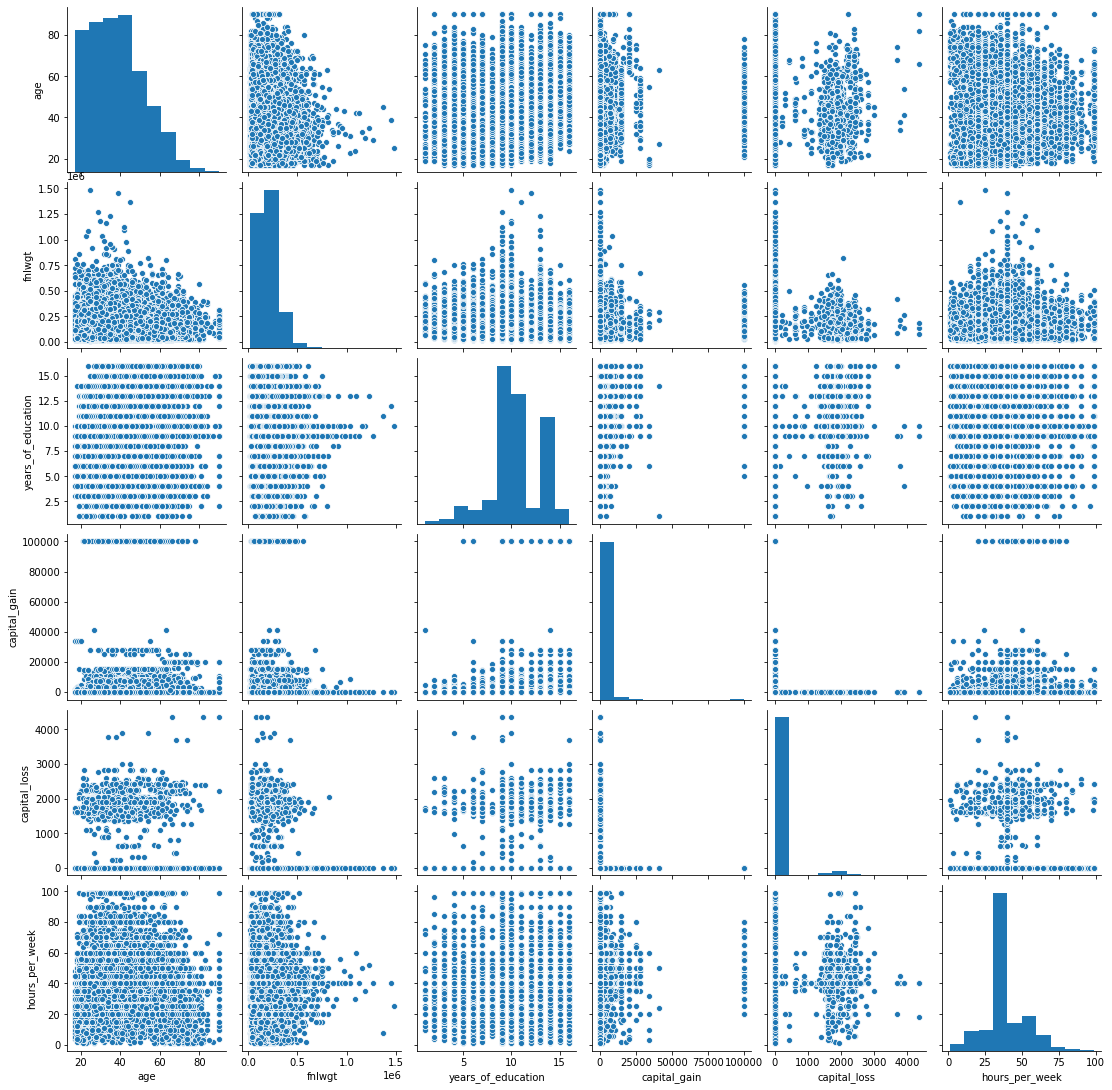

In [18]:
sns.pairplot(data=numeric_variables)
%time

In [19]:
income.describe()

,age,fnlwgt,years_of_education,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


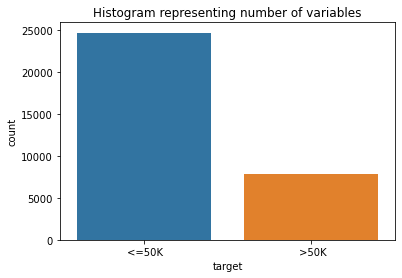

In [20]:
sns.countplot(x='target',data=income)
mlt.title('Histogram representing number of variables')
mlt.show()

**The target class is inbalanced. This would affect the predictive ability of the model if not handled**   

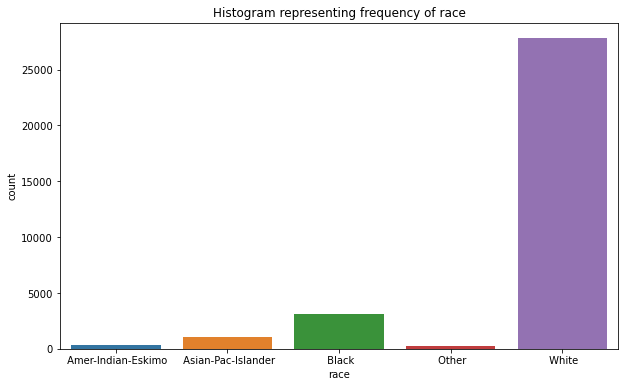

In [21]:
mlt.figure(figsize=(10,6))
sns.countplot(x='race',data=income)
mlt.title('Histogram representing frequency of race')

mlt.show()

In [22]:
income.groupby(income['target']).mean()

,age,fnlwgt,years_of_education,capital_gain,capital_loss,hours_per_week
target,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


**NOTE**

Customers who earned over 50 thousand dollars per year worked an average of 45 hours per week which is considerably much higher than customers who earned below 50 thousand dollars and worked for about 38 hours a week 

In [23]:
income.groupby(income['race']).mean()

,age,fnlwgt,years_of_education,capital_gain,capital_loss,hours_per_week
race,,,,,,
Amer-Indian-Eskimo,37.173633,120831.147910,9.311897,625.266881,34.176849,40.048232
Asian-Pac-Islander,37.746872,159940.609240,10.960539,1478.358037,97.222329,40.127045
Black,37.767926,228013.124200,9.486236,609.940461,60.385083,38.422855
Other,33.457565,197124.191882,8.841328,934.660517,61.070111,39.468635
White,38.769881,187298.064280,10.135246,1121.660375,90.806155,40.689100


**Note**

Customers of Asian-Pac_Islander on average spent the highest amount of time on education, closely followed by customers of white descent.

In [24]:
income.groupby(income['sex']).mean()

,age,fnlwgt,years_of_education,capital_gain,capital_loss,hours_per_week
sex,,,,,,
Female,36.858230,185746.311206,10.035744,568.410547,61.187633,36.410361
Male,39.433547,191771.449013,10.102891,1329.370078,100.213309,42.428086


In [25]:
income.groupby(income['work_class'])['hours_per_week','years_of_education'].mean()  

/home/alahira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,hours_per_week,years_of_education
work_class,,
?,31.919390,9.260349
Federal-gov,41.379167,10.973958
Local-gov,40.982800,11.042045
Never-worked,28.428571,7.428571
Private,40.267096,9.879714
Self-emp-inc,48.818100,11.137097
Self-emp-not-inc,44.421881,10.226289
State-gov,39.031587,11.375963
Without-pay,32.714286,9.071429


In [26]:
income['work_class'].unique()

[State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked]
Categories (9, object): [State-gov, Self-emp-not-inc, Private, Federal-gov, ..., ?, Self-emp-inc, Without-pay, Never-worked]

In [27]:
income.groupby(income['native_country']).mean().head(10)

,age,fnlwgt,years_of_education,capital_gain,capital_loss,hours_per_week
native_country,,,,,,
?,38.725557,193300.897084,10.598628,1806.518010,118.265866,41.512864
Cambodia,37.789474,193080.368421,8.789474,1027.842105,183.052632,40.894737
Canada,42.545455,179852.933884,10.652893,1504.132231,129.933884,40.404959
China,42.533333,179047.986667,11.120000,366.480000,179.520000,37.786667
Columbia,39.711864,225149.406780,9.372881,180.610169,27.152542,39.067797
Cuba,45.768421,246291.347368,9.600000,367.231579,70.042105,39.157895
Dominican-Republic,37.728571,192089.557143,7.114286,1476.057143,25.171429,42.471429
Ecuador,36.642857,185858.821429,9.464286,527.607143,0.000000,39.571429
El-Salvador,34.132075,254392.971698,6.839623,574.320755,31.113208,36.792453


## FEATURE ENGINEERING AND SELECTION

STANDARDIZE CONTINOUS VARIABLES

In [28]:
scaler = StandardScaler()

income[['age','fnlwgt','years_of_education','capital_gain','capital_loss','hours_per_week']]= scaler.fit_transform(
    income[['age','fnlwgt','years_of_education','capital_gain','capital_loss','hours_per_week']])

In [29]:
income.head()

,age,work_class,fnlwgt,education,years_of_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


GET DUMMY VARIABLES

In [30]:
encoder = LabelEncoder()

income['work_class'] = encoder.fit_transform(income['work_class'])
income['education'] = encoder.fit_transform(income['education'])
income['marital_status'] = encoder.fit_transform(income['marital_status'])
income['occupation'] = encoder.fit_transform(income['occupation'])
income['relationship'] = encoder.fit_transform(income['relationship'])
income['race'] = encoder.fit_transform(income['race'])
income['sex'] = encoder.fit_transform(income['sex'])
income['native_country'] = encoder.fit_transform(income['native_country'])
income['target'] = encoder.fit_transform(income['target'])

In [31]:
income.head()

,age,work_class,fnlwgt,education,years_of_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0


In [32]:
income.to_csv(processed_file_path + 'cleaned_data.csv')

<br />

**Resample Target Variable**

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [34]:
# undersample and over sample target classes
under = RandomUnderSampler(sampling_strategy=0.75)
over = SMOTE(sampling_strategy=0.5)

In [35]:
## create resampling pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [36]:
y = income['target']
x = income.drop(labels = 'target', axis = 1)

In [37]:
## fit and resample dataset
x, y= pipeline.fit_resample(x, y)

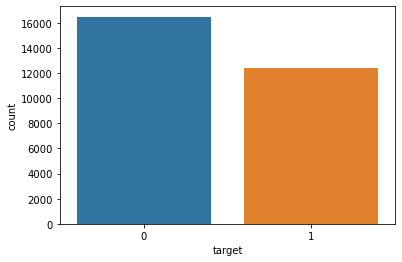

In [38]:
sns.countplot(y)

<br />

**FEATURE SELECTION USING STATISTICAL SIGNIFICANCE**

In [39]:
x_includ = sm.add_constant(x)

logit= sm.Logit(y, x_includ).fit()

Optimization terminated successfully.
         Current function value: 0.465919
         Iterations 9


In [40]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                28840
Model:                          Logit   Df Residuals:                    28825
Method:                           MLE   Df Model:                           14
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                  0.3177
Time:                        23:51:04   Log-Likelihood:                -13437.
converged:                       True   LL-Null:                       -19695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8892      0.129     -6.897      0.000      -1.142      -0.637
age                    0.5208      0.018     28.670      0.000       0.485       0.556
work_class            -0.0315      0.011     -2.869      0.004      -0.053      -0.010
fnlwgt                 0.0503      0.016      3.234      0.001       0.020       0.081
education              0.0146      0.005      3.094      0.002       0.005       0.024
years_of_education     0.8701      0.018     48.951      0.000       0.835       0.905
marital_status        -0.2806      0.012    -23.433      0.000      -0.304      -0.257
occupation             0.0063      0.004      1.716      0.086      -0.001       0.013
relationship          -0.1095      0.013     -8.298      0.000      -0.135      -0.084
race                   0.1287      0.020      6.528      0.000       0.090       0.167
sex                    0.8257      0.048     17.203      0.000       0.732       0.920
capital_gain           2.4792      0.082     30.130      0.000       2.318       2.640
capital_loss           0.2682      0.014     19.100      0.000       0.241       0.296
hours_per_week         0.3963      0.018     22.376      0.000       0.362       0.431
native_country         0.0011      0.002      0.555      0.579      -0.003       0.005
======================================================================================
"""

<br />

**native_country is not statistically significant and will have to be dropped from the model to improve the performance**

In [41]:
# drop native_country variable
x.drop(columns=['native_country'], axis =1, inplace=True)

In [42]:
#test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.80, random_state = 10)

## Modeling

### Binary Logistic Regression

In [43]:
regression = LogisticRegression(solver = 'liblinear')

In [44]:
def train_model(algorithm, x_train, y_train, x_test, y_test):
    """Train algorithm and return trained model"""
    
    #train algorithm and make predicitons
    algorithm.fit(x_train,y_train)
    algo_preds = algorithm.predict(x_test)
    
    #check metrics
    report = classification_report(y_test, algo_preds)
    
    return algorithm, report

In [45]:
lr_model, class_report = train_model(regression, x_train, y_train, x_test, y_test)

In [46]:
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     13202
           1       0.75      0.70      0.72      9870

    accuracy                           0.77     23072
   macro avg       0.77      0.76      0.76     23072
weighted avg       0.77      0.77      0.77     23072



### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg','lbfgs','liblinear']

pen = ['l2']

c_values = [100,10,1.0,0.1,0.01]

In [48]:
param_grid = {'solver':solvers, 'C': c_values, 'penalty':pen }

In [49]:
grid = GridSearchCV(regression, param_grid, verbose = 2, n_jobs = 2)

In [50]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   12.9s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:   18.8s finished


GridSearchCV(estimator=LogisticRegression(solver='liblinear'), n_jobs=2,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [51]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [52]:
logistic_grid_pred = grid.predict(x_test) 

In [53]:
print (classification_report(y_test, logistic_grid_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     13202
           1       0.75      0.70      0.72      9870

    accuracy                           0.77     23072
   macro avg       0.77      0.76      0.76     23072
weighted avg       0.77      0.77      0.77     23072



There are no significant improvements in the accuracy score of the model after using GridSearch to tune the hyperparameters of the Binary Logistic Regression

### Random Forests 

In [54]:
rfc = RandomForestClassifier()

In [55]:
rfc_model, rfc_class_report = train_model(rfc, x_train, y_train, x_test, y_test)

In [56]:
print(rfc_class_report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     13202
           1       0.80      0.82      0.81      9870

    accuracy                           0.83     23072
   macro avg       0.83      0.83      0.83     23072
weighted avg       0.83      0.83      0.83     23072



### Hyperparameter Tuning 

In [57]:
n_estimators = [10,100,1000]
criterion = ['gini', 'entropy']
max_features = ['sqrt','log2']

In [58]:
rfc_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'criterion':criterion }

In [59]:
rfc_grid_search = GridSearchCV(estimator = rfc, param_grid=rfc_grid, verbose=2, n_jobs=2)

In [60]:
rfc_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  2.8min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             verbose=2)

In [61]:
rfc_grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}

In [62]:
rfc_grid_pred = rfc_grid_search.predict(x_test)

In [63]:
accuracy_score(y_test, rfc_grid_pred)

0.8333044382801664

In [64]:
print (classification_report(rfc_grid_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     13024
           1       0.81      0.80      0.81     10048

    accuracy                           0.83     23072
   macro avg       0.83      0.83      0.83     23072
weighted avg       0.83      0.83      0.83     23072



**Serialize model**

In [65]:
import pickle

In [66]:
filename ='random_forest_model.sav'

pickle.dump(rfc_grid_search, open(model_path + filename,'wb'))